In [1]:
import pandas as pd
from chase.base import *
from chase.utils import *
from chase.fit import *

FIGDEST = '/Users/markant/Dropbox/Apps/ShareLaTeX/ssDFE/ssDFE_v3/recovery/figures/'

from copy import deepcopy
import os

# Sim 1a: Recovery of linear weighting (six problems)

In [105]:
theta_set = [1, 2, 3, 4, 5]
pstay_set = [.1, .3, .5]
tau_set = [.1, .3, .5]
genpar = []
for theta in theta_set:
    for pstay in pstay_set:
        for tau in tau_set:
            genpar.append({'theta': theta,
                           'p_stay': pstay,
                           'tau': tau,})

In [106]:
PSET = '6p'
pars = ['theta', 'p_stay', 'tau']
cols = ['theta', 'p_stay', 'tau', 'N', 'iterations']
for p in pars:
    cols += ['bf_%s_25' % p, 'bf_%s_50' % p, 'bf_%s_75' % p]
    
results = []

for j, gp in enumerate(genpar):
    vals = [gp[p] for p in pars]
    
    for N in [20, 100]:

        pth = 'recovery_fits_optional_linear/dataset%s_%s_N=%s_fits.csv' % (j, PSET, N)
        
        if os.path.exists(pth):
        
            #print j
        
            df = pd.read_csv(pth, index_col=0)
            arr = vals + [N, df.shape[0]]
            for p in pars:
                res = list(df[p].describe()[['25%', '50%', '75%']].values)
                arr += res
    
            results.append(arr)

fitdf = pd.DataFrame(results, columns=cols)
#np.round(fitdf, 3)

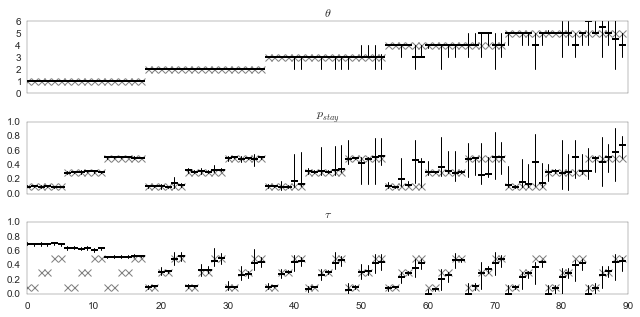

In [119]:
labs = [r'$\theta$', r'$p_{stay}$', r'$\tau$']

fig, axi = plt.subplots(3, 1, figsize=(9,3*1.5), sharex=True)

for i, p in enumerate(['theta', 'p_stay', 'tau']):
    
    ax = axi[i]
    ax.plot(fitdf[p], 'x', markersize=7, markeredgecolor='gray', markeredgewidth=1)
    ax.plot(fitdf['bf_%s_50' % p], '_', markerfacecolor='none', markeredgecolor='black',
            markeredgewidth=2)


    for j, row in fitdf.iterrows():
        ax.plot([j,j], row[['bf_%s_25' % p, 'bf_%s_75' % p]].values,
                color='black', linewidth=1)

    ax.set_title(labs[i])
    for i in ax.spines.itervalues():
        i.set_linewidth(0.3)


    
axi[0].set_ylim(0, 6)
axi[1].set_ylim(0, 1)
axi[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

fig.savefig(FIGDEST+'recovery_optional_linear.pdf', bbox_inches='tight')

# Sim 1b: Recovery of probability weighting

In [120]:
theta_set = [1, 2, 3, 4, 5]
pstay_set = [.3]
tau_set = [.3]
gamma_set = [.5, 1., 1.5]
delta_set = [.5, 1., 1.5]
genpar = []
for theta in theta_set:
    for pstay in pstay_set:
        for tau in tau_set:
            for gamma in gamma_set:
                for delta in delta_set:
                    genpar.append({'theta': theta,
                                    'p_stay': pstay,
                                    'tau': tau,
                                    'prelec_gamma': gamma,
                                    'prelec_elevation': delta})

In [183]:
PSET = '6p'
pars = ['theta', 'p_stay', 'tau', 'prelec_gamma', 'prelec_elevation']
cols = pars + ['N', 'iterations']
for p in pars:
    cols += ['bf_%s_25' % p, 'bf_%s_50' % p, 'bf_%s_75' % p]
    
results = []

for j, gp in enumerate(genpar):
    vals = [gp[p] for p in pars]
    
    for N in [20, 100]:

        pth = 'recovery_fits_optional_prob/dataset%s_%s_N=%s_fits.csv' % (j, PSET, N)
        
        if os.path.exists(pth):
        
            #print j
        
            df = pd.read_csv(pth, index_col=0)
            arr = vals + [N, df.shape[0]]
            for p in pars:
                res = list(df[p].describe()[['25%', '50%', '75%']].values)
                arr += res
    
            results.append(arr)

fitdf = pd.DataFrame(results, columns=cols)
#np.round(fitdf, 3)

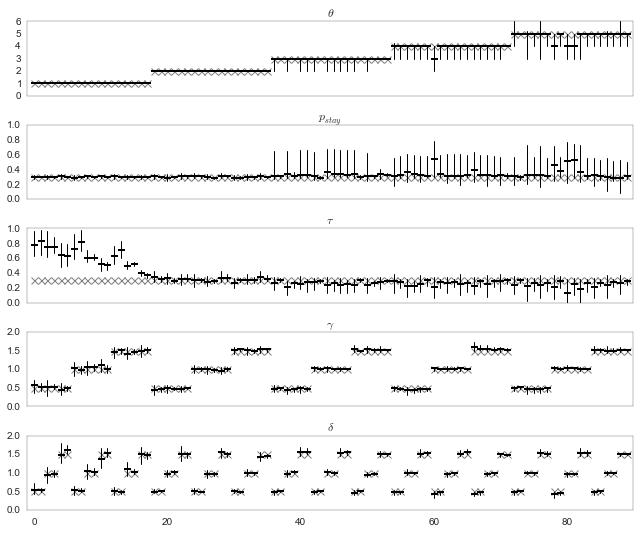

In [184]:
labs = [r'$\theta$', r'$p_{stay}$', r'$\tau$', '$\gamma$', '$\delta$']

fig, axi = plt.subplots(len(pars), 1, figsize=(9,5*1.5), sharex=True)

for i, p in enumerate(pars):
    
    ax = axi[i]
    ax.plot(fitdf[p], 'x', markersize=7, markeredgecolor='gray', markeredgewidth=1)
    ax.plot(fitdf['bf_%s_50' % p], '_', markerfacecolor='none', markeredgecolor='black',
            markeredgewidth=2)


    for j, row in fitdf.iterrows():
        ax.plot([j,j], row[['bf_%s_25' % p, 'bf_%s_75' % p]].values,
                color='black', linewidth=1)

    ax.set_title(labs[i])
    for i in ax.spines.itervalues():
        i.set_linewidth(0.3)



axi[0].set_ylim(0, 6)
axi[1].set_ylim(0, 1)
axi[2].set_ylim(0, 1)
axi[3].set_ylim(0, 2)
axi[4].set_ylim(0, 2)
axi[0].set_xlim(-1, fitdf.shape[0])

    

plt.tight_layout()
plt.show()

fig.savefig(FIGDEST+'recovery_optional_prob.pdf', bbox_inches='tight')

# Sim 1c: Recovery of value weighting

In [2]:
theta_set = [1, 2, 3, 4, 5]
pstay_set = [.3]
tau_set = [.3]
alpha_set = [.5, 1., 1.5]
genpar = []
for theta in theta_set:
    for pstay in pstay_set:
        for tau in tau_set:
            for alpha in alpha_set:
                genpar.append({'theta': theta,
                                'p_stay': pstay,
                                'tau': tau,
                                'pow_gain': alpha})

In [3]:
PSET = '6p'
pars = ['theta', 'p_stay', 'tau', 'pow_gain']
cols = pars + ['N', 'iterations']
for p in pars:
    cols += ['bf_%s_25' % p, 'bf_%s_50' % p, 'bf_%s_75' % p]
    
results = []

for j, gp in enumerate(genpar):
    vals = [gp[p] for p in pars]

    for N in [20, 100]:

        pth = 'recovery_fits_optional_value/fits_%s_N=%s_theta=%s_pstay=%s_tau=%s_alpha=%s.csv' % (PSET, N, gp['theta'], gp['p_stay'], gp['tau'], gp['pow_gain'])

        if os.path.exists(pth):

            #print j

            df = pd.read_csv(pth, index_col=0)
            arr = vals + [N, df.shape[0]]
            for p in pars:
                res = list(df[p].describe()[['25%', '50%', '75%']].values)
                arr += res

            results.append(arr)

fitdf = pd.DataFrame(results, columns=cols)
#np.round(fitdf, 3)

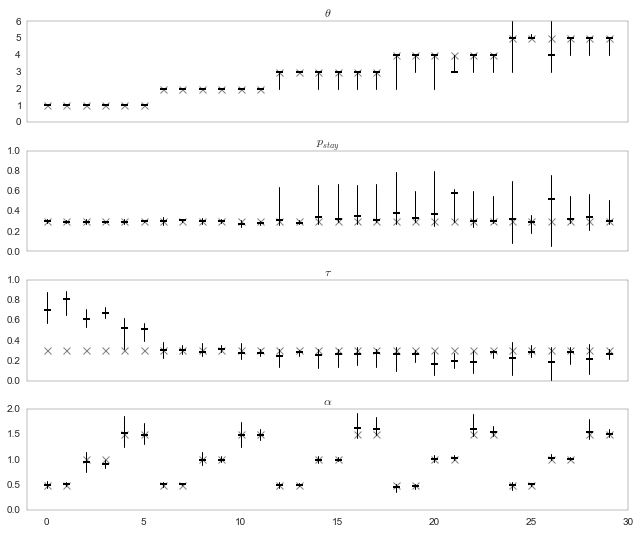

In [5]:
labs = [r'$\theta$', r'$p_{stay}$', r'$\tau$', r'$\alpha$']

fig, axi = plt.subplots(len(pars), 1, figsize=(9,5*1.5), sharex=True)

for i, p in enumerate(pars):
    
    ax = axi[i]
    ax.plot(fitdf[p], 'x', markersize=7, markeredgecolor='gray', markeredgewidth=1)
    ax.plot(fitdf['bf_%s_50' % p], '_', markerfacecolor='none', markeredgecolor='black',
            markeredgewidth=2)


    for j, row in fitdf.iterrows():
        ax.plot([j,j], row[['bf_%s_25' % p, 'bf_%s_75' % p]].values,
                color='black', linewidth=1)

    ax.set_title(labs[i])
    for i in ax.spines.itervalues():
        i.set_linewidth(0.3)



axi[0].set_ylim(0, 6)
axi[1].set_ylim(0, 1)
axi[2].set_ylim(0, 1)
axi[3].set_ylim(0, 2)
axi[0].set_xlim(-1, fitdf.shape[0])

plt.tight_layout()
plt.show()

fig.savefig(FIGDEST+'recovery_6p_optional_value.pdf', bbox_inches='tight')

# Sim 2a: Planned vs. optional

In [2]:
from mypy.viz import tableau20

In [3]:
theta_set = [1, 2, 3, 4, 5]
pstay_set = [.1, .3, .5]
tau_set = [.1, .3, .5]
genpar = []
for theta in theta_set:
    for pstay in pstay_set:
        for tau in tau_set:
            genpar.append({'theta': theta,
                           'p_stay': pstay,
                           'tau': tau,})

In [31]:
PSET = '6p'
pars = ['theta', 'p_stay', 'tau']
pars2 = ['theta', 'p_stay', 'tau', 'mu', 'sc']
cols = pars + ['N', 'iterations', 'pr(optional)', 'pr(planned)']

results = []

for j, gp in enumerate(genpar):
    vals = [gp[p] for p in pars]
    
    for N in [20, 100]:
        
        pth_optional = 'recovery_fits_optional_linear/dataset%s_%s_N=%s_fits.csv' % (j, PSET, N)
        pth_planned  = 'recovery_fits_planned_to_optional_linear/fits_planned_%s_N=%s_theta=%s_pstay=%s_tau=%s.csv' % (PSET, N, gp['theta'], gp['p_stay'], gp['tau'])


        if os.path.exists(pth_optional) and os.path.exists(pth_planned):
            df = pd.read_csv(pth_optional, index_col=0)
            bic_opt = np.array(map(lambda nllh: bic(nllh, len(pars), N*6), df.nllh))
            
            df = pd.read_csv(pth_planned, index_col=0)
            bic_planned = np.array(map(lambda nllh: bic(nllh, len(pars2), N*6), df.nllh))
        
            results.append(vals + [N, df.shape[0], np.sum(bic_opt < bic_planned), np.sum(bic_opt > bic_planned)])

fitdf = pd.DataFrame(results, columns=cols)

In [32]:
# average over parameter combinations 
df = fitdf.groupby(['theta', 'N']).agg(np.mean).reset_index()
df.drop(['p_stay', 'tau', 'pr(planned)', 'iterations'], axis=1, inplace=True)
np.round(df.pivot(index='theta', columns='N', values='pr(optional)'), 1)

N,20,100
theta,,
1,75.1,81.0
2,84.3,93.6
3,94.9,97.7
4,95.8,99.1


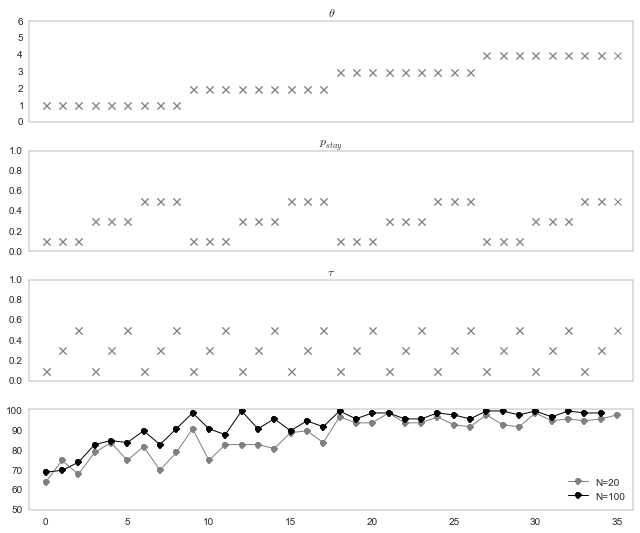

In [33]:
labs = [r'$\theta$', r'$p_{stay}$', r'$\tau$']
fig, axi = plt.subplots(len(pars)+1, 1, figsize=(9,5*1.5), sharex=True)
cols = ['gray', 'black']

for j, N in enumerate([20, 100]):

    sel = fitdf[fitdf.N==N]
    
    for i, p in enumerate(pars):

        ax = axi[i]
        ax.plot(sel[p], 'x', markersize=7, markeredgecolor='gray', markeredgewidth=1)


        #for j, row in fitdf.iterrows():
        #    ax.plot([j,j], row[['bf_%s_25' % p, 'bf_%s_75' % p]].values,
        #            color='black', linewidth=1)

        ax.set_title(labs[i])

    axi[3].plot(sel['pr(optional)'], '-o', color=cols[j], 
                markerfacecolor=cols[j], linewidth=1, label='N=%s' % N)

for ax in axi:
    for i in ax.spines.itervalues():
        i.set_linewidth(0.3)



axi[0].set_ylim(0, 6)
axi[1].set_ylim(0, 1)
axi[2].set_ylim(0, 1)
axi[3].set_ylim(50, 101)
axi[0].set_xlim(-1, fitdf.shape[0]/2 + 1)

axi[3].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Sim 3a: Optional, switching

In [18]:
theta_set = [2, 4]
pstay_set = [.3]
tau_set = [.1, .5]
pswitch_set = [.1, .5, .9]
genpar = []
for theta in theta_set:
    for pstay in pstay_set:
        for tau in tau_set:
            for pswitch in pswitch_set:
                genpar.append({'theta': theta,
                            'p_stay': pstay,
                            'tau': tau,
                            'p_switch': pswitch})

In [26]:
PSET = '6p'
pars = ['theta', 'p_stay', 'tau', 'p_switch']
cols = pars + ['N', 'iterations']
for p in pars:
    cols += ['bf_%s_25' % p, 'bf_%s_50' % p, 'bf_%s_75' % p]
    
results = []

for j, gp in enumerate(genpar):
    vals = [gp[p] for p in pars]

    for N in [20, 100]:

        pth = 'recovery_switching_fits_optional_linear/dataset_%s_N=%s_fits_theta=%s_pstay=%s_tau=%s_pswitch=%s.csv' % (PSET, N, gp['theta'], gp['p_stay'], gp['tau'], gp['p_switch'])
        
        if os.path.exists(pth):

            #print j

            df = pd.read_csv(pth, index_col=0)
            arr = vals + [N, df.shape[0]]
            for p in pars:
                res = list(df[p].describe()[['25%', '50%', '75%']].values)
                arr += res

            results.append(arr)

fitdf = pd.DataFrame(results, columns=cols)
#np.round(fitdf, 3)

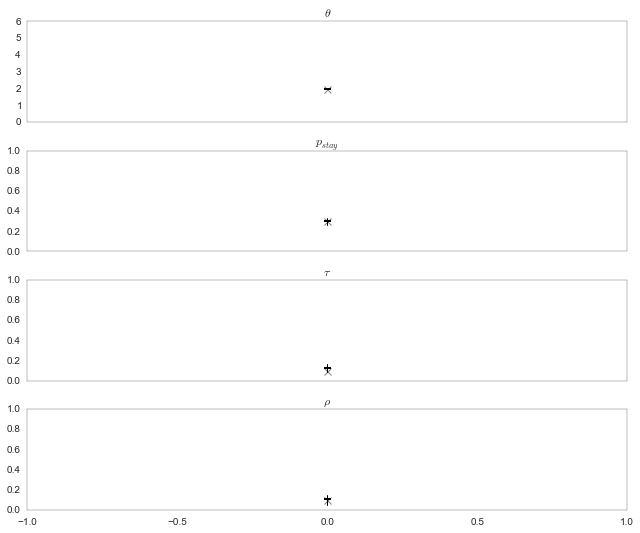

In [28]:
labs = [r'$\theta$', r'$p_{stay}$', r'$\tau$', r'$\rho$']
fig, axi = plt.subplots(len(pars), 1, figsize=(9,5*1.5), sharex=True)

for i, p in enumerate(pars):
    
    ax = axi[i]
    ax.plot(fitdf[p], 'x', markersize=7, markeredgecolor='gray', markeredgewidth=1)
    ax.plot(fitdf['bf_%s_50' % p], '_', markerfacecolor='none', markeredgecolor='black',
            markeredgewidth=2)


    for j, row in fitdf.iterrows():
        ax.plot([j,j], row[['bf_%s_25' % p, 'bf_%s_75' % p]].values,
                color='black', linewidth=1)

    ax.set_title(labs[i])
    for i in ax.spines.itervalues():
        i.set_linewidth(0.3)



axi[0].set_ylim(0, 6)
axi[1].set_ylim(0, 1)
axi[2].set_ylim(0, 1)
axi[3].set_ylim(0, 1)
axi[0].set_xlim(-1, fitdf.shape[0])

plt.tight_layout()
plt.show()

#fig.savefig(FIGDEST+'recovery_6p_optional_value.pdf', bbox_inches='tight')